In [3]:
import numpy as np
import pandas as pd 
from datetime import datetime

%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

Transform to csv files

In [78]:
#import pandas as pd 
#tsv_file="/Users/gregorsink/Desktop/PR Projekt/Data/title.akas.tsv"
#csv_table=pd.read_table(tsv_file,sep='\t')
#csv_table.to_csv('/Users/gregorsink/Desktop/PR Projekt/Data/Dataakas.csv',index=False)

Preberimo datoteke

In [5]:
#movies = pd.read_csv("Data/akas.csv")
#ratings = pd.read_csv("Data/ratings.csv")
#netflix = pd.read_csv("Data/netflix_titles.csv")
netflix1 = pd.read_csv("Netflix_all.csv")
#names = pd.read_csv("Data/names_basic.csv")


In [30]:
ratings = ratings.rename(columns = {'tconst':'titleId'})

originals = movies[movies["types"] == "original"]
#originals = originals[["titleId", "title"]]

originals = originals.merge(ratings, on="titleId")
#netflix1 = netflix.merge(originals, on="title")

In [48]:
def najdi(table):
    if table.empty:
        return table
    else:
        return table.iloc[table["numVotes"].argmax()]

def getMovieDirID(MovieName):
    for index, row in projekt.iterrows():
        if (projekt.loc[index, row["title"]] == MovieName):
            return projekt.loc[index, row["directors"]]

def getDirector(dirID):
    df=director_names_and_stats[["nconst","primaryName"]]
    for index, row in df.iterrows():     
        if(df.loc[index, row["nconst"]] == dirID):
            return df.loc[index,"primaryName"]

netflix['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [33]:
i = 0
netflix1 = netflix
for idx, naslov in enumerate(netflix1["title"]):
    i += 1
    table = originals[originals["title"] == naslov]
    if table.empty:
        pass
    else:
        a = najdi(originals[originals["title"] == naslov])
        netflix1.loc[idx, "averageRating"] = a["averageRating"]
        netflix1.loc[idx, "numVotes"] = a["numVotes"]

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200


In [1]:
from imdb import IMDb

movs = IMDb()

In [15]:
from imdb import IMDb
from imdb import IMDbDataAccessError

movs = IMDb()
i = 0

for idx, naslov in enumerate(netflix1["title"]):
    i += 1
    if netflix1.loc[idx, "director"] == "0":
        m = movs.search_movie(naslov)
        if len(m) > 0:
            try:
                data = movs.get_movie(m[0].movieID)
                netflix1.loc[idx, "director"] = data["director"][0]['name']
            except KeyError as e:
                netflix1.loc[idx, "director"] = "-1"
            except (URLError, IMDbDataAccessErro) as e:
                print(data)
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200


In [242]:
dic = {'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7', 'August':'8', 'September':'9', 'October':'10', 'November':'11', 'December':'12', '':'0'}
netflix1['month_added'] = 0
netflix1['year_added'] = 0
for index, row in netflix1.iterrows():
    if(row['date_added'] != "0"):
        monthDay_year = row['date_added'].split(", ")
        day_month = monthDay_year[0].split(" ")
        if(len(day_month) > 2):
            netflix1.loc[index, "date_added"] = "%s-%s-%s" % (day_month[2], dic[day_month[1]],                                  monthDay_year[1])
            netflix1.loc[index, "month_added"]= dic[day_month[1]]
            netflix1.loc[index, "year_added"]= monthDay_year[1]
        else:
            netflix1.loc[index, "date_added"] = "%s-%s-%s" % (day_month[1], dic[day_month[0]],                                  monthDay_year[1])
            netflix1.loc[index, "month_added"]= dic[day_month[0]]
            netflix1.loc[index, "year_added"]= monthDay_year[1]
        

In [273]:
#netflix1.to_csv("/Users/gregorsink/Desktop/PR Projekt/PR19KKZDBMPBPGS/Netflix_all.csv", index=False)
netflixContentByYears = netflix1.groupby(['year_added'])['year_added'].agg(['count'])
netflixContentByYears = netflixContentByYears.reset_index()
netflixContentByYears.drop([0])

#netflixContentByYears.set_index('index')

,year_added,count
1,2008,2
2,2009,2
3,2010,1
4,2011,13
5,2012,7
6,2013,12
7,2014,25
8,2015,90
9,2016,456
10,2017,1300


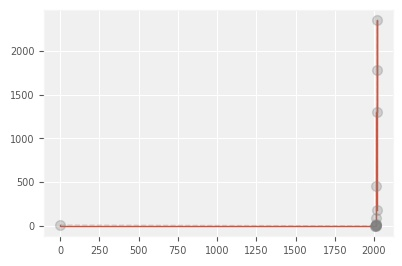

In [283]:
#netflixContentByYears = netflixContentByYears.astype('int64', copy=False)

x = netflixContentByYears['year_added']
y = netflixContentByYears['count']

plt.step(x, y, label='pre (default)')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)
plt.show()

In [280]:
#netflix1 = netflix1.sort_values(by='date_added', ascending=False)
#netflix1 = pd.to_datetime(netflix1['date_added'], dayfirst=True)
#netflix1['date_added'] = pd.to_datetime(netflix1['date_added']).dt.year
#netflix1['Year'] = pd.DatetimeIndex(netflix1['date_added']).month 
#tv_show = df[df["type"] == "TV Show"]
#movies = df[df["type"] == "Movie"]
for index, row in netflix1.iterrows():
    if(row['date_added'] != '0'):
        aaa = row['date_added']
        new = aaa.split("-")
        netflix1.loc[index, "month_added"]= new[1]
        netflix1[index, "year_added"]= new[2] 
        



KeyboardInterrupt: 

(6234, 14)